# Summary Statistics, data processing and unsupervised learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

sns.set()

In [2]:
# The data contains 70,000 28 × 28 images (60,000 as training and 10,000 as testing)

fashion_mnist_train = pd.read_csv('fashion-mnist_train.csv')
print('The shape for the fashion_mnist_train is', fashion_mnist_train.shape)

fashion_mnist_test = pd.read_csv('fashion-mnist_test.csv')
print('The shape for the fashion_mnist_test is', fashion_mnist_test.shape)

The shape for the fashion_mnist_train is (60000, 785)
The shape for the fashion_mnist_test is (10000, 785)


## Provide a frequency table of the outcome variable in both training and testing data.

In [3]:
frequency_table = pd.DataFrame(
    np.vstack((fashion_mnist_train['label'].value_counts().values, 
               fashion_mnist_test['label'].value_counts().values)),
    index = ['train', 'test']
)
frequency_table

,0,1,2,3,4,5,6,7,8,9
train,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


## clustering algorithm

In [4]:
X, y = fashion_mnist_train[fashion_mnist_train.columns.values[1:]], fashion_mnist_train['label']
print('The shape for X, y are {} and {}, respectively.'.format(X.shape, y.shape))

# Standardize all the numerical features
ss = StandardScaler()
X_std = ss.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = X.columns)

The shape for X, y are (60000, 784) and (60000,), respectively.


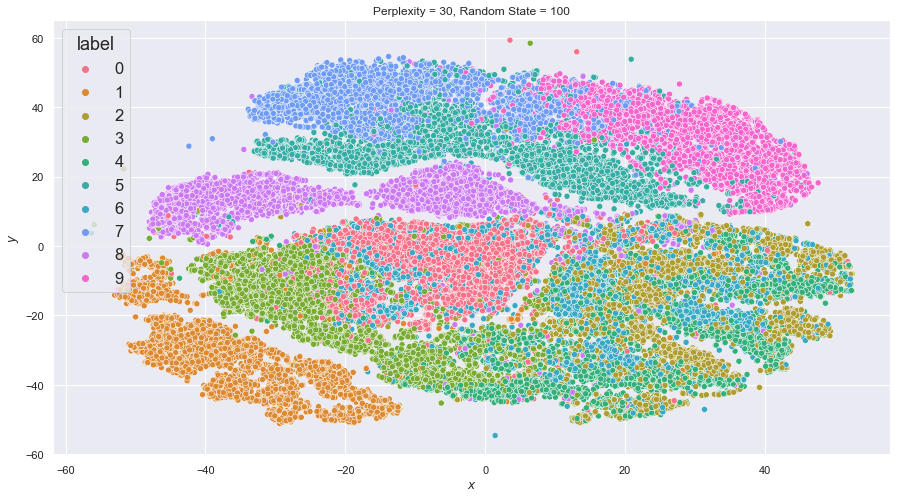

In [5]:
tsne = TSNE(n_components = 2, perplexity = 30, random_state = 100)
data_tsne = tsne.fit_transform(X_std)
df_tsne = pd.DataFrame(data_tsne, columns = ['x', 'y'], index = X.index)

# Show the diagram
fig, ax = plt.subplots(figsize = (15, 8))
with sns.plotting_context("notebook", font_scale = 1.5):
    sns.scatterplot(x = 'x',
                    y = 'y',
                    hue = y,
                    palette = sns.color_palette("husl", 10),
                    data = df_tsne,
                    ax = ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.title('Perplexity = 30, Random State = 100')
plt.show()

### KMeans

Text(0.5, 1.0, 'Elbow Method Results for Data')

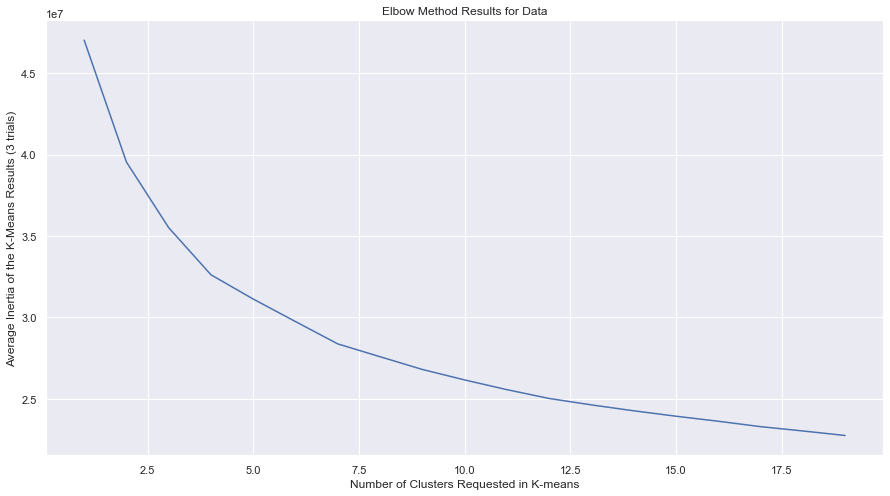

In [6]:
cluster_num_list = range(1,20)
avg_inertia_list = []
for k in cluster_num_list:
    sub_inertia_list = []
    for i in range(0,3):
        kmeans = KMeans(n_clusters = k).fit(X_std)
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

#Plot it  
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(cluster_num_list,avg_inertia_list)
ax.set_xlabel('Number of Clusters Requested in K-means')
ax.set_ylabel('Average Inertia of the K-Means Results (3 trials)')
ax.set_title('Elbow Method Results for Data')

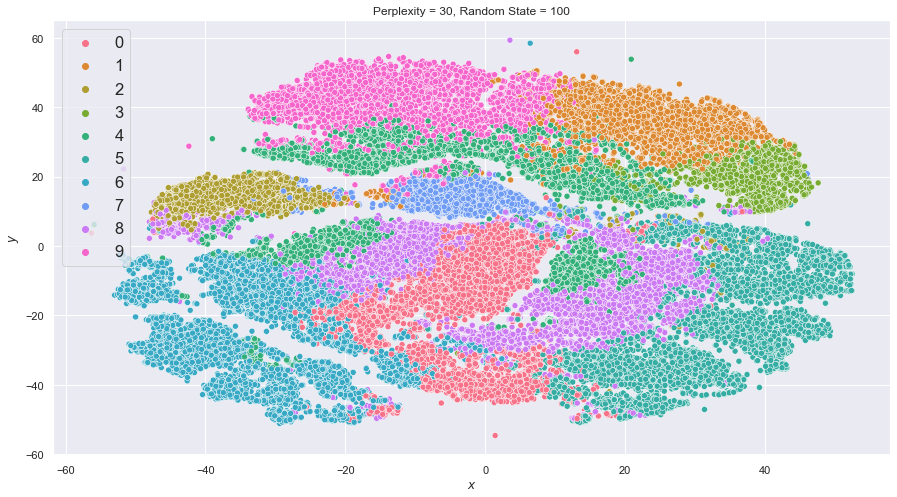

In [7]:
# We will choose k = to fit the KMeans model (from results above)
k = 10

kmeans_fit = KMeans(n_clusters = k, random_state = 1000).fit(X_std)

# Show the diagram
fig, ax = plt.subplots(figsize = (15, 8))
with sns.plotting_context("notebook", font_scale = 1.5):
    sns.scatterplot(x = 'x',
                    y = 'y',
                    hue = kmeans_fit.labels_,
                    palette = sns.color_palette("husl", 10),
                    data = df_tsne,
                    ax = ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.title('Perplexity = 30, Random State = 100')
plt.show()

In [8]:
KMeans_adjusted_rand_score = np.round(adjusted_rand_score(y, kmeans_fit.labels_), 4)
print('The adjusted rand score for the KMeans fit is ', KMeans_adjusted_rand_score)
print("--------------------------------------------")
KMeans_homogeneity_score = np.round(homogeneity_score(y, kmeans_fit.labels_), 4)
print('The homogeneity score for the KMeans fit is ', KMeans_homogeneity_score)
print("--------------------------------------------")
KMeans_completeness_score = np.round(completeness_score(y, kmeans_fit.labels_), 4)
print('The completeness score for the KMeans fit is ', KMeans_completeness_score)
print("--------------------------------------------")
KMeans_v_measure_score = np.round(v_measure_score(y, kmeans_fit.labels_), 4)
print('The v measure score for the KMeans fit is ', KMeans_v_measure_score)

The adjusted rand score for the KMeans fit is  0.35
--------------------------------------------
The homogeneity score for the KMeans fit is  0.4948
--------------------------------------------
The completeness score for the KMeans fit is  0.5195
--------------------------------------------
The v measure score for the KMeans fit is  0.5069


### Principal component analysis

The cumulative variance is [0.22057176 0.36452739 0.41911541 0.4702794  0.51097213 0.54109367
 0.56859848 0.5918572  0.60880158 0.62189991]


Text(0.5, 0, 'Principal components')

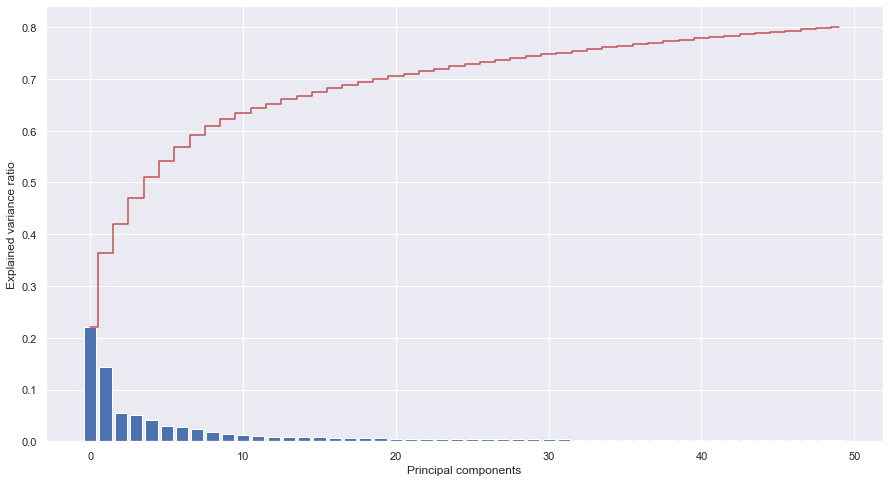

In [9]:
pca = PCA(random_state = 1000)
Y = pca.fit_transform(X_std)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print('The cumulative variance is', cum_var_exp[:10])

fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(range(50),var_exp[:50], align = 'center', label = 'individual explained variance')
ax.step(range(50), cum_var_exp[:50], 'r', where = 'mid', label = 'cumulative explained variance')
ax.set_ylabel('Explained variance ratio')
ax.set_xlabel('Principal components')